<a href="https://www.kaggle.com/code/lakshmipriya190803/beginner-friendly-eda-and-time-series-forecasting?scriptVersionId=158348824" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Exploring Daily Dollar Price Trends: An EDA and Time Series Forecasting Journey 


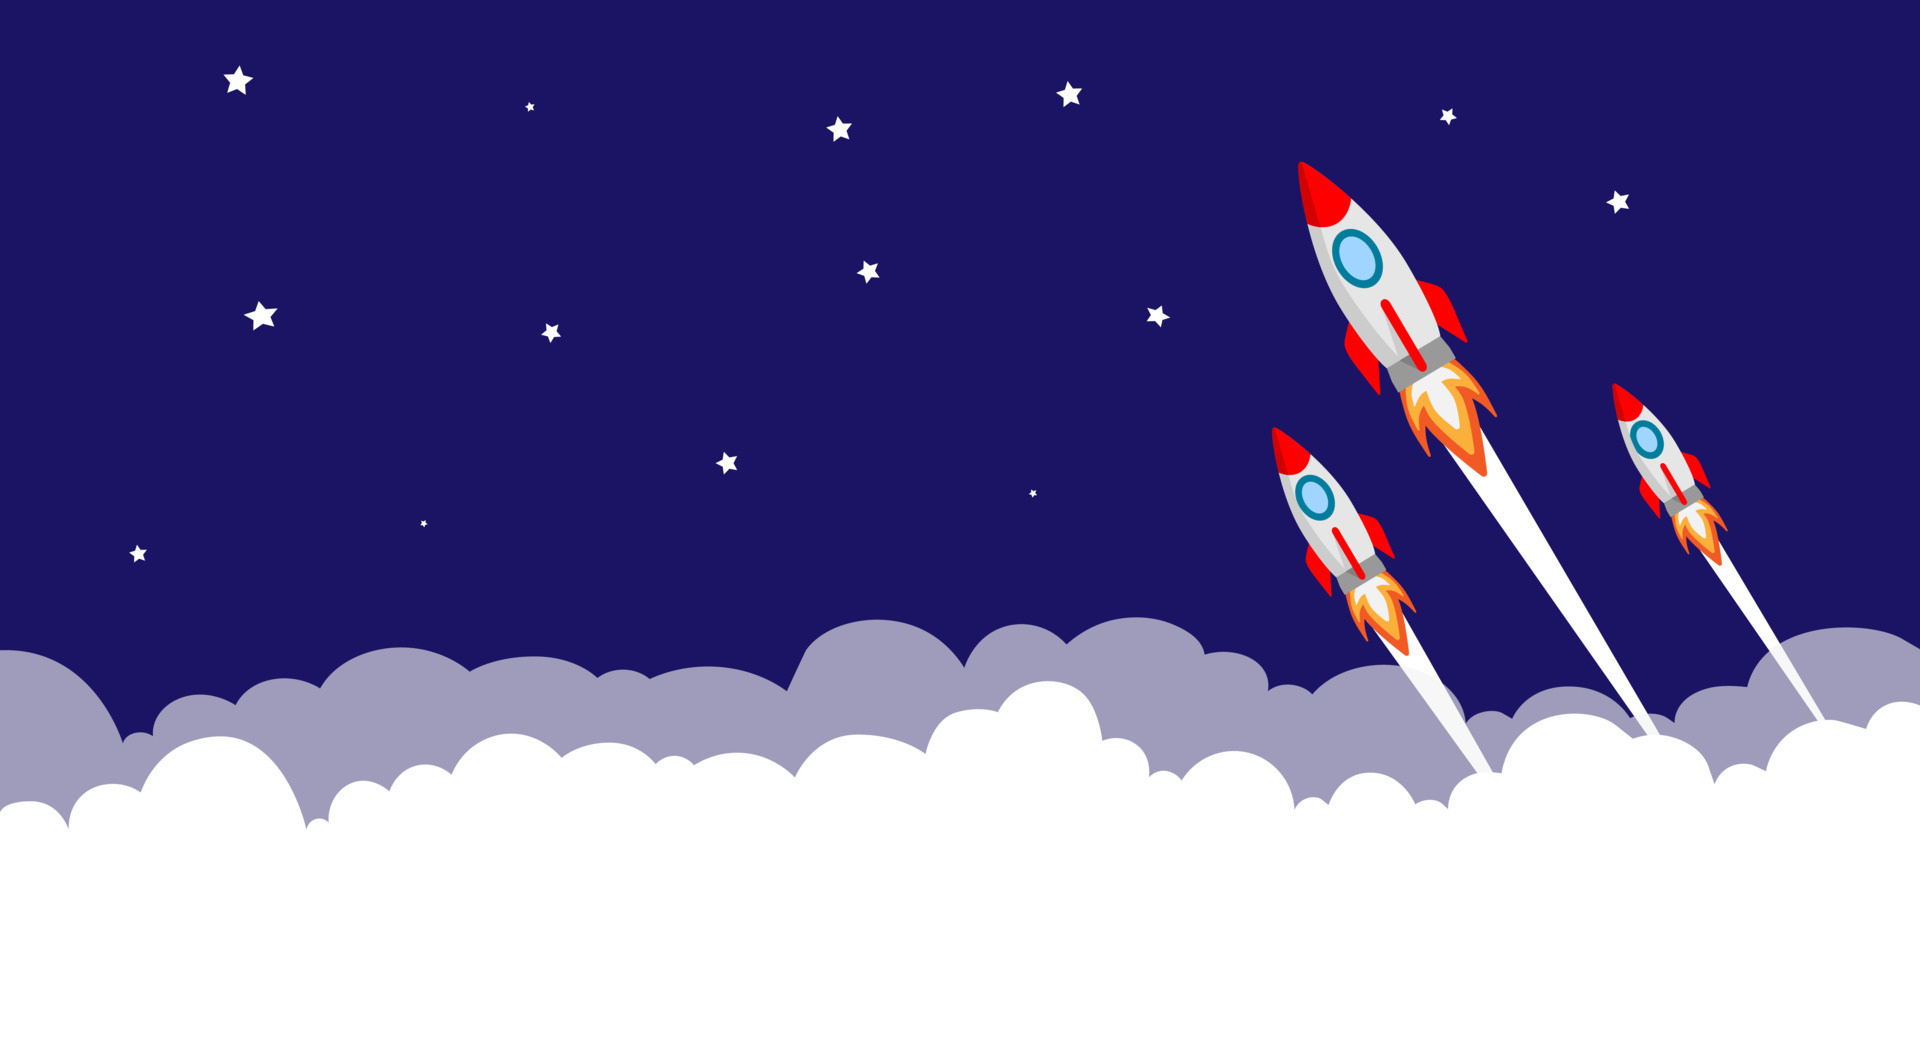


Hey there, fellow data explorers! Welcome aboard this wild ride through the world of daily dollar price trends. 🚀 We're about to dive deep into this dataset that's all about tracking the dollar's rollercoaster journey. And trust me, it's more than just numbers—it's like peeking into the heartbeat of the global economy!

In this notebook, we'll be using snazzy visualizations, number crunching, and a ton of data sorcery to uncover hidden patterns, trends, and maybe even a few surprises behind the dollar's day-to-day mood swings.

If you find my notebook useful, ***please*** **UPVOTE**

### Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the Data

In [2]:
df = pd.read_csv("/kaggle/input/ohlc-dollar-daily-price/Dolar_Raoofi_pyFinance.csv")

### Looking at the basic information of the features of this dataset

In [3]:
print("Here's some sample data to look at: ")
print()
print()
df.head(5)

Here's some sample data to look at: 




,J-Date,Date,Weekday,Open,High,Low,Close
0,1390-09-05,2011-11-26,Saturday,13700,13700,13700,13700
1,1390-09-06,2011-11-27,Sunday,13440,13440,13440,13440
2,1390-09-07,2011-11-28,Monday,13350,13350,13350,13350
3,1390-09-08,2011-11-29,Tuesday,13400,13400,13400,13400
4,1390-09-09,2011-11-30,Wednesday,13500,13500,13500,13500


Okay we have the dates in Islamic and Gregorian Calendars, Weekday, Open price,Low and Closing price

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3769 entries, 0 to 3768
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   J-Date   3769 non-null   object
 1   Date     3769 non-null   object
 2   Weekday  3769 non-null   object
 3   Open     3769 non-null   int64 
 4   High     3769 non-null   int64 
 5   Low      3769 non-null   int64 
 6   Close    3769 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 206.2+ KB


In [5]:
print("Looking for any null values ?")
print()
df.isnull().sum()

Looking for any null values ?



J-Date     0
Date       0
Weekday    0
Open       0
High       0
Low        0
Close      0
dtype: int64

In [6]:
print("I'm going to stick to Gregorian Calendar")
df = df.drop(['J-Date'], axis=1)

I'm going to stick to Gregorian Calendar


Let's see the outliers of 'Open' , 'High' , 'Low' , and 'Close'

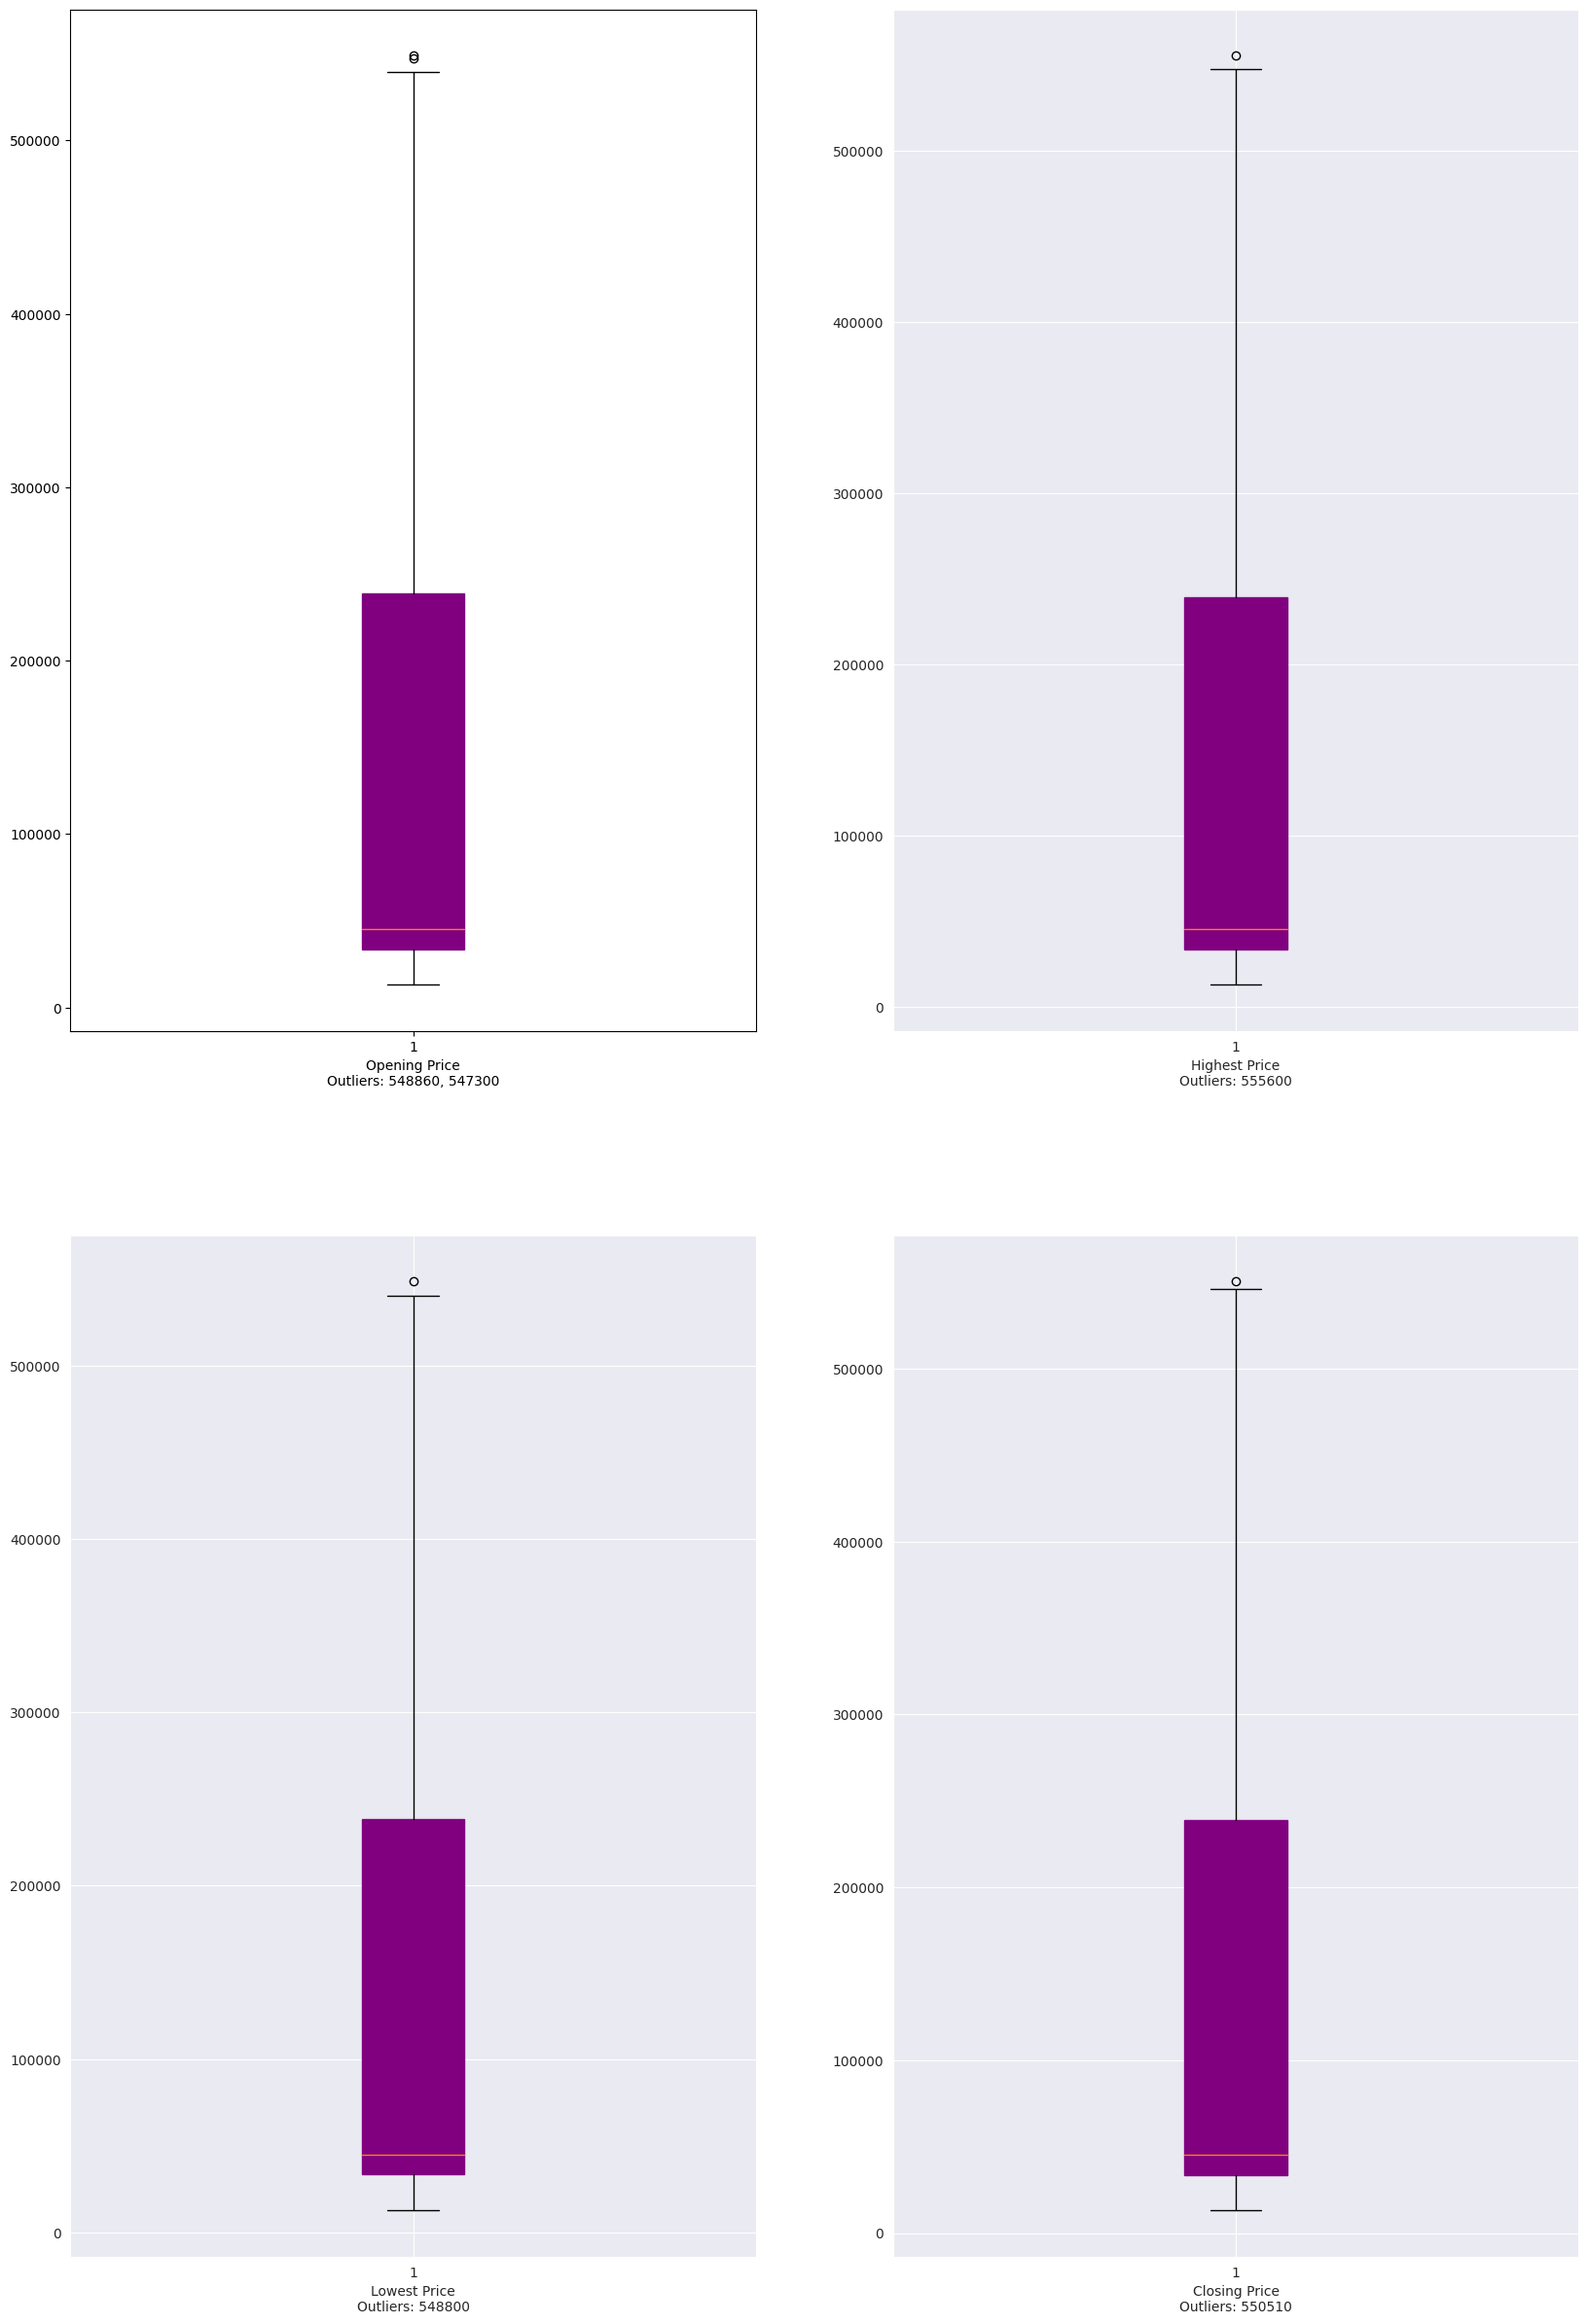

In [7]:
plt.figure(figsize=(20, 30))
plt.subplot(2, 2, 1)
sns.set_style('darkgrid')

# Create the boxplot and color the boxes
box = plt.boxplot(df['Open'], showfliers=True, patch_artist=True)

# Change the color of boxes and outliers
for box_element in ['boxes', 'fliers']:
    plt.setp(box[box_element], color='purple')  # Change box color to blue

# Extracting outliers using matplotlib's boxplot statistics
outliers = [flier.get_ydata() for flier in box['fliers']]

outlier_values = ", ".join([str(outlier) for sublist in outliers for outlier in sublist])
xlabel_text = 'Opening Price\nOutliers: ' + outlier_values

plt.xlabel(xlabel_text)

#####################################################################################################

plt.subplot(2, 2, 2)
sns.set_style('darkgrid')

# Create the boxplot and color the boxes
box = plt.boxplot(df['High'], showfliers=True, patch_artist=True)

# Change the color of boxes and outliers
for box_element in ['boxes', 'fliers']:
    plt.setp(box[box_element], color='purple')  # Change box color to blue

# Extracting outliers using matplotlib's boxplot statistics
outliers = [flier.get_ydata() for flier in box['fliers']]

outlier_values = ", ".join([str(outlier) for sublist in outliers for outlier in sublist])
xlabel_text = 'Highest Price\nOutliers: ' + outlier_values

plt.xlabel(xlabel_text)

#####################################################################################################

plt.subplot(2, 2, 3)
sns.set_style('darkgrid')

# Create the boxplot and color the boxes
box = plt.boxplot(df['Low'], showfliers=True, patch_artist=True)

# Change the color of boxes and outliers
for box_element in ['boxes', 'fliers']:
    plt.setp(box[box_element], color='purple')  # Change box color to blue

# Extracting outliers using matplotlib's boxplot statistics
outliers = [flier.get_ydata() for flier in box['fliers']]

outlier_values = ", ".join([str(outlier) for sublist in outliers for outlier in sublist])
xlabel_text = 'Lowest Price\nOutliers: ' + outlier_values

plt.xlabel(xlabel_text)

#####################################################################################################

plt.subplot(2, 2, 4)
sns.set_style('darkgrid')

# Create the boxplot and color the boxes
box = plt.boxplot(df['Close'], showfliers=True, patch_artist=True)

# Change the color of boxes and outliers
for box_element in ['boxes', 'fliers']:
    plt.setp(box[box_element], color='purple')  # Change box color to blue

# Extracting outliers using matplotlib's boxplot statistics
outliers = [flier.get_ydata() for flier in box['fliers']]

outlier_values = ", ".join([str(outlier) for sublist in outliers for outlier in sublist])
xlabel_text = 'Closing Price\nOutliers: ' + outlier_values

plt.xlabel(xlabel_text)


plt.show()

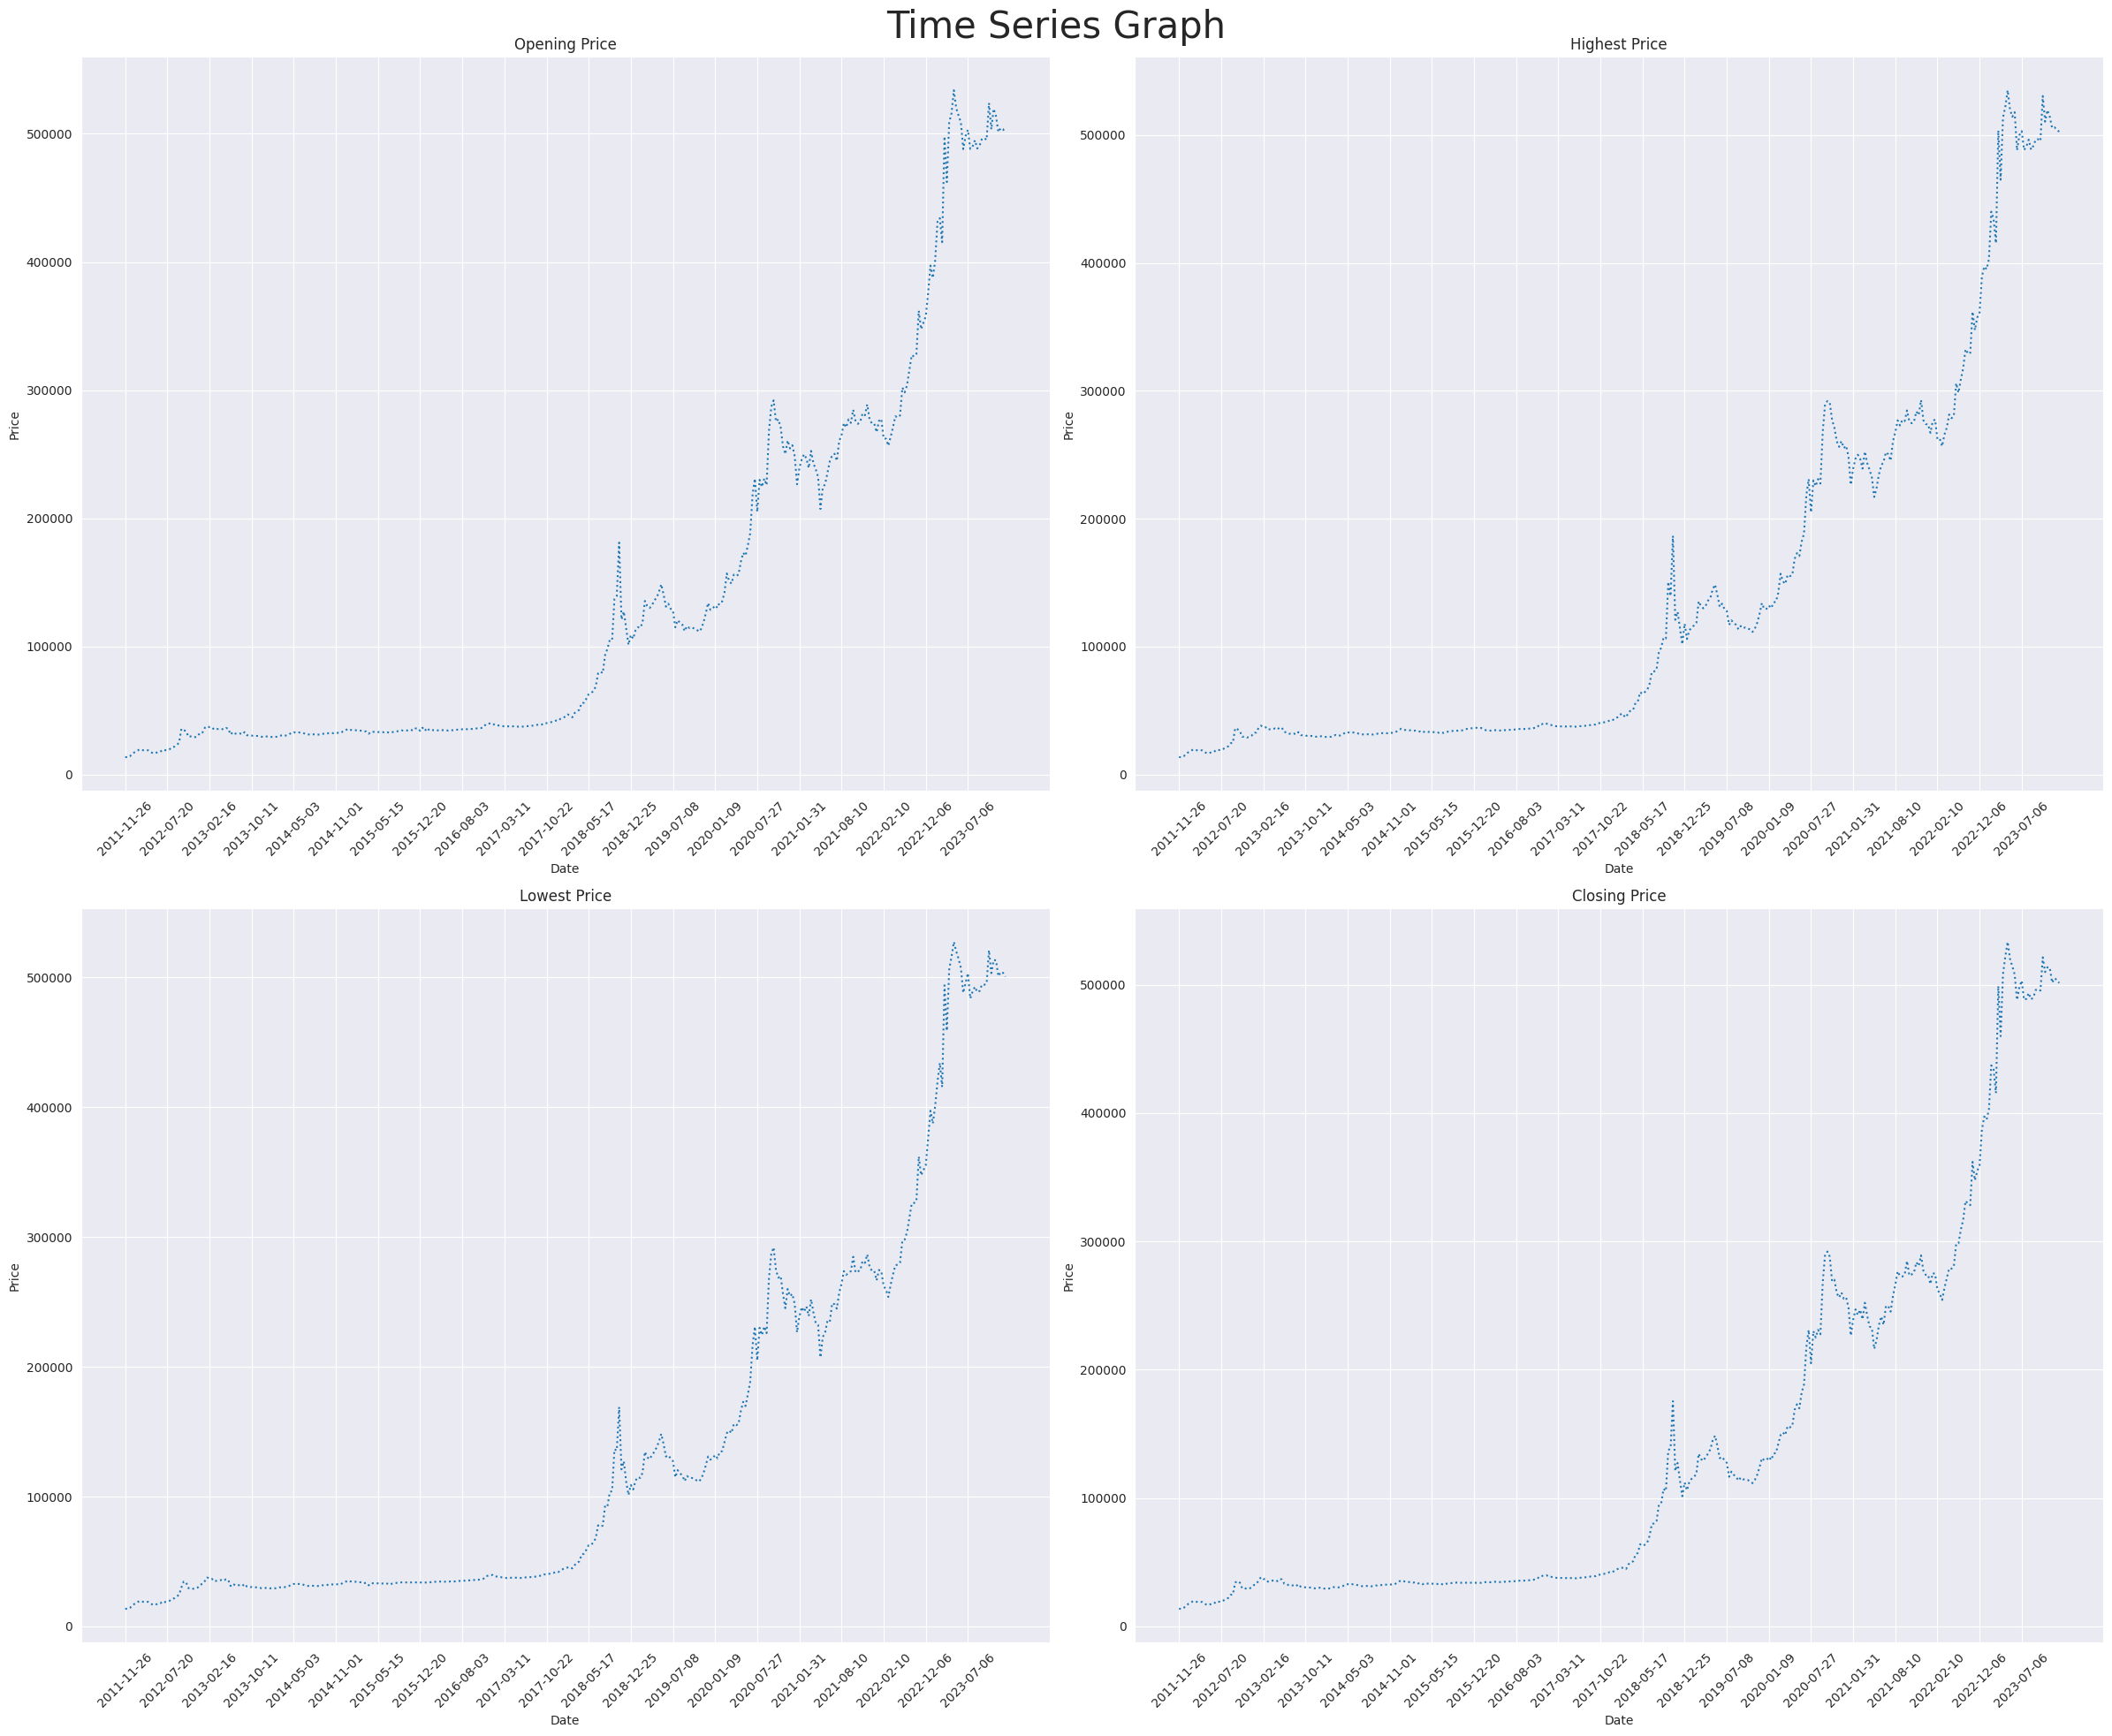

In [8]:
plt.figure(figsize=(24, 20))

plt.suptitle('Time Series Graph', fontsize=30)  # General title for the entire figure

plt.subplot(2, 2, 1)
plt.plot(df['Date'][::10], df['Open'][::10], linestyle='dotted')
plt.title("Opening Price")
plt.xlabel('Date')
plt.ylabel('Price')
n = 20
plt.xticks(df['Date'][::10][::len(df['Date'][::10]) // n], rotation=45)

plt.subplot(2, 2, 2)
plt.plot(df['Date'][::10], df['High'][::10], linestyle='dotted')
plt.title("Highest Price")
plt.xlabel('Date')
plt.ylabel('Price')
n = 20
plt.xticks(df['Date'][::10][::len(df['Date'][::10]) // n], rotation=45)

plt.subplot(2, 2, 3)
plt.plot(df['Date'][::10], df['Low'][::10], linestyle='dotted')
plt.title("Lowest Price")
plt.xlabel('Date')
plt.ylabel('Price')
n = 20
plt.xticks(df['Date'][::10][::len(df['Date'][::10]) // n], rotation=45)

plt.subplot(2, 2, 4)
plt.plot(df['Date'][::10], df['Close'][::10], linestyle='dotted')
plt.title("Closing Price")
plt.xlabel('Date')
plt.ylabel('Price')
n = 20
plt.xticks(df['Date'][::10][::len(df['Date'][::10]) // n], rotation=45)

plt.tight_layout()  # Adjusts subplot parameters to fit into the figure area properly
plt.show()

### You've come this far... why not upvote and motivate me :/...